In [1]:
import pandas as pd

df = pd.read_csv (r'https://data.chhs.ca.gov/dataset/f243090b-4c05-4c61-b614-7cb49b86b21d/resource/e6828e3c-bf54-4991-865b-b4cc11719b8d/download/cdph_ssi_adult_odp_2020h1.csv')
print (df)

        Year       State       County                             HAI  \
0     2020H1  California          NaN  Surgical Site Infections (SSI)   
1     2020H1  California          NaN  Surgical Site Infections (SSI)   
2     2020H1  California          NaN  Surgical Site Infections (SSI)   
3     2020H1  California          NaN  Surgical Site Infections (SSI)   
4     2020H1  California          NaN  Surgical Site Infections (SSI)   
...      ...         ...          ...                             ...   
5730  2020H1  California  Los Angeles  Surgical Site Infections (SSI)   
5731  2020H1  California  Los Angeles  Surgical Site Infections (SSI)   
5732  2020H1  California  Los Angeles  Surgical Site Infections (SSI)   
5733  2020H1  California  Los Angeles  Surgical Site Infections (SSI)   
5734  2020H1  California  Los Angeles  Surgical Site Infections (SSI)   

                                    Operative_Procedure  Facility_ID  \
0                       STATE OF CALIFORNIA POOLED 

In [2]:
df.shape

(5735, 12)

In [7]:
df=df.dropna()

In [33]:
facilities = df.groupby(['Facility_Name'])[['Procedure_Count','Infections_Reported','Infections_Predicted']].sum()

In [38]:
facilities.head()

,Procedure_Count,Infections_Reported,Infections_Predicted
Facility_Name,,,
AHMC Anaheim Regional Medical Center,1064,2,4.64
AHMC Seton Medical Center,394,2,2.16
Adventist Health Clearlake,138,0,0.64
Adventist Health Mendocino Coast,72,0,0.49
Adventist Health Simi Valley,524,0,2.60


In [47]:
facilities['infection_ratio']=facilities['Infections_Reported']/facilities['Procedure_Count']

In [48]:
facilities.head()

,Procedure_Count,Infections_Reported,Infections_Predicted,infection_ratio
Facility_Name,,,,
AHMC Anaheim Regional Medical Center,1064,2,4.64,0.001880
AHMC Seton Medical Center,394,2,2.16,0.005076
Adventist Health Clearlake,138,0,0.64,0.000000
Adventist Health Mendocino Coast,72,0,0.49,0.000000
Adventist Health Simi Valley,524,0,2.60,0.000000


In [44]:
counties=df.groupby(['County'])[['Procedure_Count','Infections_Reported','Infections_Predicted']].sum()

In [45]:
counties.head()

,Procedure_Count,Infections_Reported,Infections_Predicted
County,,,
Alameda,18052,98,109.01
Amador,428,0,2.59
Butte,4382,12,22.11
Calaveras,32,0,0.15
Contra Costa,13726,94,92.87


In [49]:
counties['infection_ratio']=counties['Infections_Reported']/counties['Procedure_Count']

In [50]:
counties.head()

,Procedure_Count,Infections_Reported,Infections_Predicted,infection_ratio
County,,,,
Alameda,18052,98,109.01,0.005429
Amador,428,0,2.59,0.000000
Butte,4382,12,22.11,0.002738
Calaveras,32,0,0.15,0.000000
Contra Costa,13726,94,92.87,0.006848


In [25]:
df2['County']='Alameda'

In [8]:
df.axes

[Int64Index([  29,   30,   31,   32,   33,   34,   35,   36,   37,   38,
             ...
             5725, 5726, 5727, 5728, 5729, 5730, 5731, 5732, 5733, 5734],
            dtype='int64', length=5706),
 Index(['Year', 'State', 'County', 'HAI', 'Operative_Procedure', 'Facility_ID',
        'Facility_Name', 'Hospital_Category_RiskAdjustment', 'Facility_Type',
        'Procedure_Count', 'Infections_Reported', 'Infections_Predicted'],
       dtype='object')]

In [9]:
df=df.dropna(subset=['Facility_Name'])

In [10]:
df['Facility_Name'].unique()

array(['Methodist Hospital of Sacramento', 'Sutter Amador Hospital',
       'Sutter Auburn Faith Hospital',
       'University of California Davis Medical Center',
       'Barton Memorial Hospital', 'Dameron Hospital',
       'Doctors Hospital of Manteca', 'Mark Twain Medical Center',
       'Marshall Medical Center', 'Doctors Medical Center',
       'Memorial Medical Center', 'Mercy General Hospital',
       'Emanuel Medical Center', 'Mercy San Juan Medical Center',
       'Kaiser Foundation Hospital, Sacramento',
       'Oak Valley Hospital District',
       'Kaiser Foundation Hospital, South Sacramento',
       'Sutter Roseville Medical Center', 'San Joaquin General Hospital',
       'Sutter Tracy Community Hospital',
       "St. Joseph's Medical Center Of Stockton",
       'Woodland Memorial Hospital', 'Sutter Davis Hospital',
       'Sutter Medical Center, Sacramento', 'Mercy Hospital of Folsom',
       'Kaiser Foundation Hospital, Manteca',
       'Kaiser Foundation Hospital, Ros

In [12]:
!pip install geopy

In [13]:
from geopy.geocoders import Nominatim

In [14]:
df['Facility_Name'].unique()[0]

'Methodist Hospital of Sacramento'

In [15]:
geolocator = Nominatim(user_agent="myGeolocator")
location = geolocator.geocode(df['Facility_Name'].unique()[0])

In [ ]:
location.raw

{'boundingbox': ['38.4616121', '38.4641533', '-121.4178193', '-121.4149091'],
 'class': 'amenity',
 'display_name': 'Methodist Hospital of Sacramento, 7500, Hospital Drive, Sacramento, Sacramento County, California, 95823, United States',
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//health_hospital.p.20.png',
 'importance': 0.563150759043076,
 'lat': '38.463021299999994',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '-121.41634890895006',
 'osm_id': 578107842,
 'osm_type': 'way',
 'place_id': 211953903,
 'type': 'hospital'}

In [16]:
df['Operative_Procedure'].unique()

array(['All procedures', 'Appendix surgery',
       'Bile duct, liver or pancreatic surgery', 'Cesarean section',
       'Colon surgery', 'Exploratory abdominal surgery (laparotomy)',
       'Gallbladder surgery', 'Gastric surgery', 'Hip prosthesis',
       'Hysterectomy, abdominal', 'Hysterectomy, vaginal',
       'Kidney surgery', 'Knee prosthesis', 'Open reduction of fracture',
       'Ovarian surgery', 'Rectal surgery', 'Small bowel surgery',
       'Thoracic surgery', 'Abdominal aortic aneurysm repair',
       'Cardiac surgery', 'Coronary bypass,chest and donor incisions',
       'Coronary bypass,chest incision only', 'Kidney transplant',
       'Laminectomy', 'Pacemaker surgery', 'Spinal fusion',
       'Spleen surgery', 'Heart transplant', 'Liver transplant'],
      dtype=object)

In [17]:
df['Operative_Procedure'].unique().shape

(29,)

In [ ]:
# distribution of all columns
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(df, 10, 5)


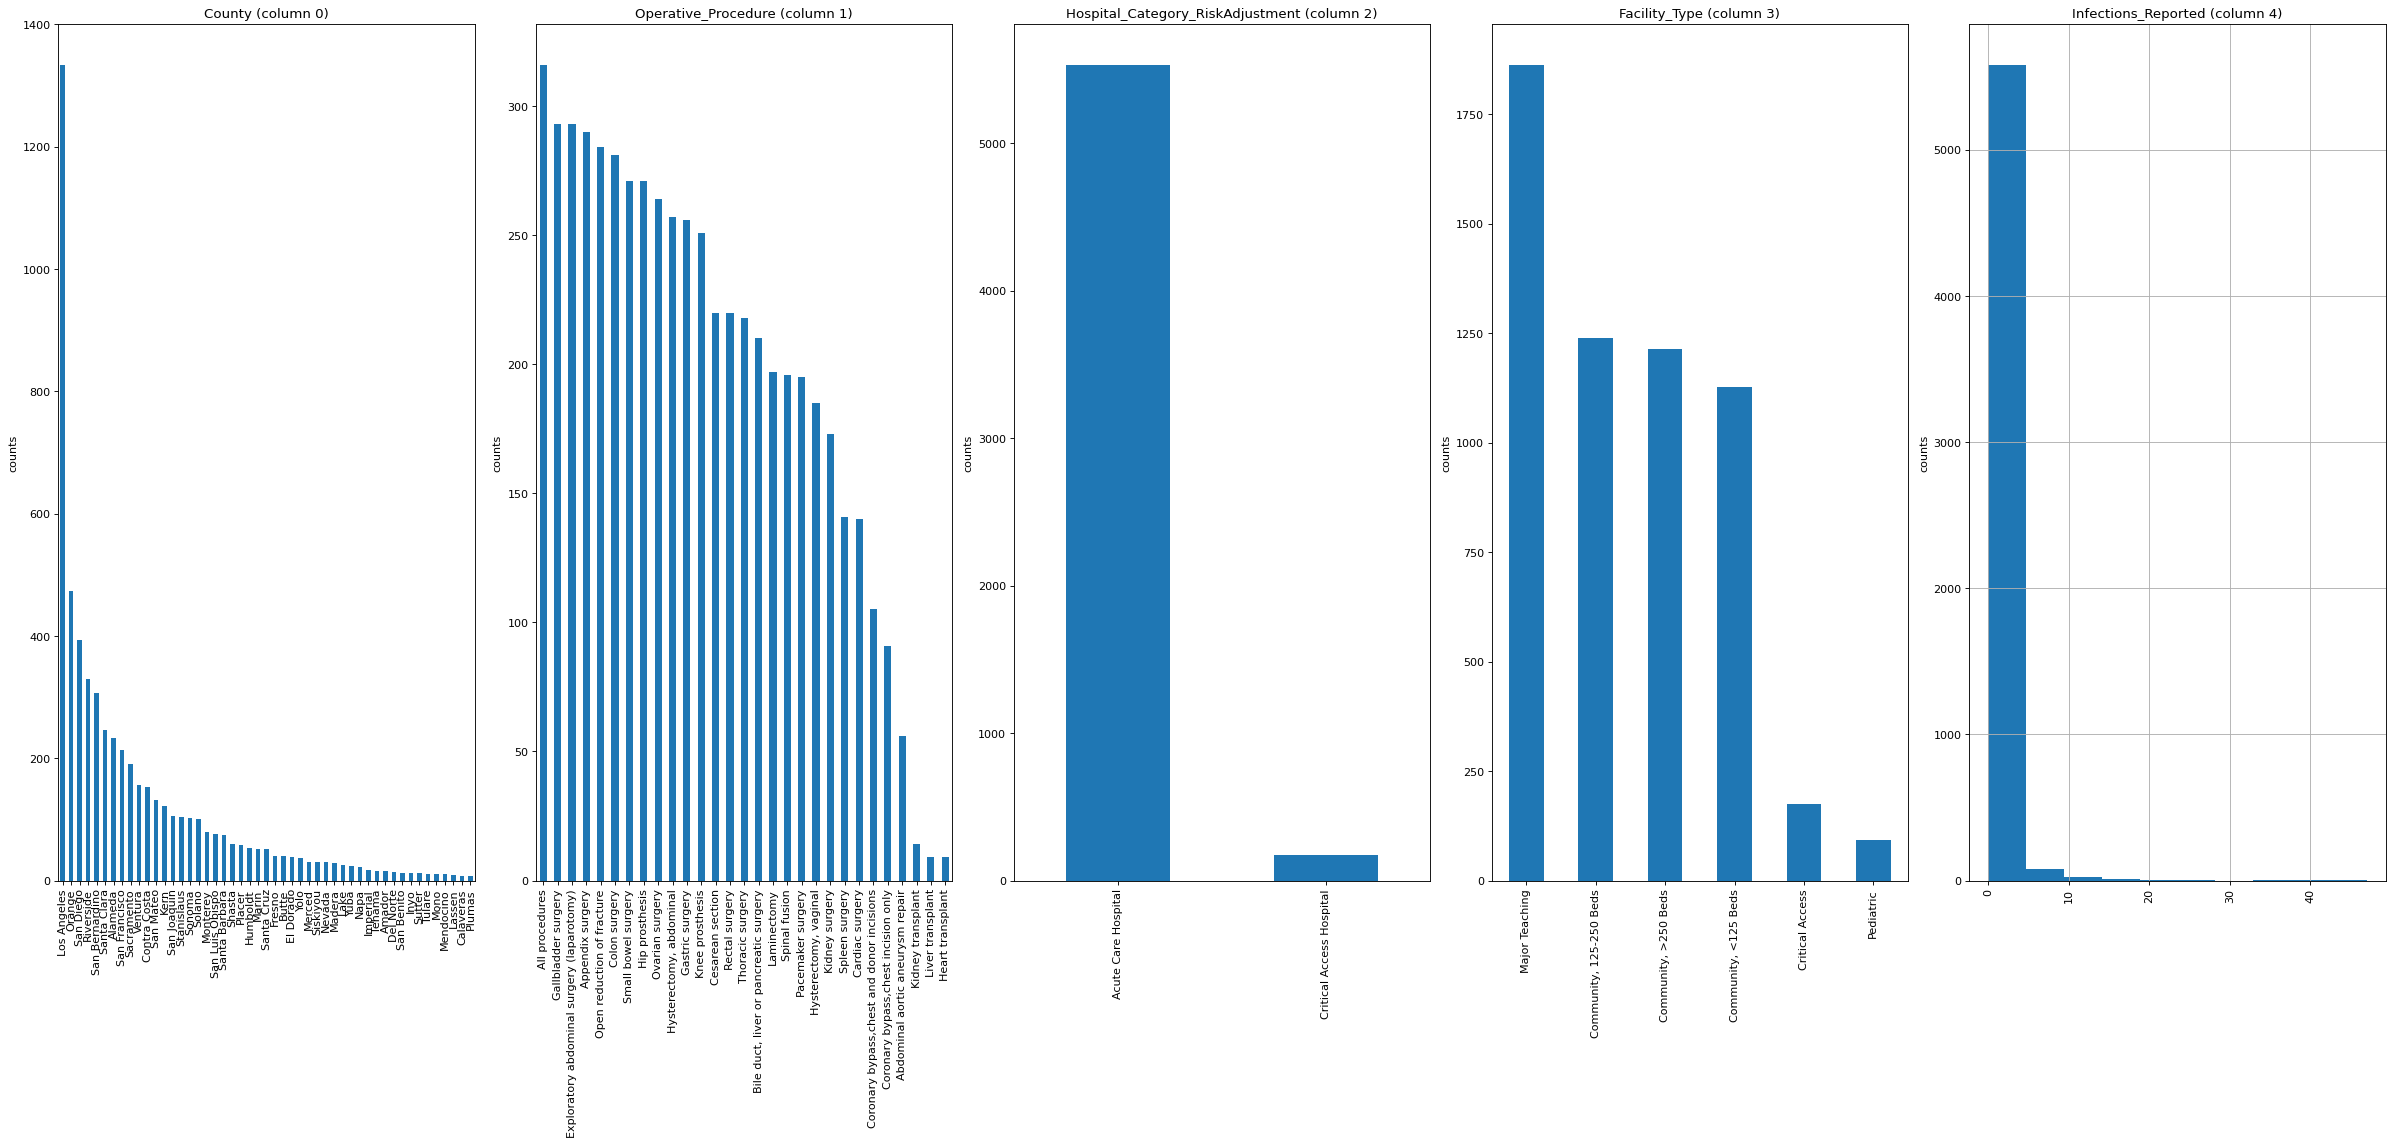

In [ ]:
plotPerColumnDistribution(df, 10, 5)


In [ ]:
!conda install geopandas

In [51]:
import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]

# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4));

ModuleNotFoundError: No module named 'geopandas'